## Logistic Regression from scratch (Binary Classification)
Implementation of Logistic Regression for Binary Classification using Gradient Descent.

#### Sources:

[Cost Function and Gradient Descent](https://www.coursera.org/learn/machine-learning/supplement/0hpMl/simplified-cost-function-and-gradient-descent)


#### Optimization algorithms:
[[advanced-optimization]](https://www.coursera.org/learn/machine-learning/lecture/licwf/advanced-optimization)
- Gradient descent
- Conjugate gradient
- BFGS
- L-BFGS


#### Useful Links:

[Logistic regression (binary) - computing the gradient](https://www.youtube.com/watch?v=hWLdFMccpTY)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Markdown as md
from numpy.random import RandomState
from sklearn.linear_model import LogisticRegression




prng = RandomState(10)

### Hypothesis function

Logistic Regression hypothesis function is defined as:
 
$$h_\theta(x) = g(\theta^Tx),$$

where function g is the Sigmoid function and is defined as:

$$g(z)= \frac{1}{1+e^{-z}}$$

### Sigmoid function - Implementation

In [2]:
def sigmoid_function(z):
    """
    Applies sigmoid function to an integer or an array
    
    Params:
        z (int or array)
    """
    return 1/(1+(np.exp(-z)))



### Sigmoid function - Properties
[[decision-boundary]](https://www.coursera.org/learn/machine-learning/supplement/N8qsm/decision-boundary)

$$z = 0 \implies e^{-z} = 1 \implies  g(z) \rightarrow 0.5$$

$$z \rightarrow \infty, \implies e^{-z} \rightarrow 0 \implies g(z) \rightarrow 1$$

$$z \rightarrow -\infty, \implies e^{-z} \rightarrow 0 \implies g(z) \rightarrow 0$$

### Test Sigmoid Function

In [3]:
print('z=0, g(z) = {}'.format(sigmoid_function(0)))
print('z=20, g(z) = {}'.format(sigmoid_function(20).round(8)))
print('z=-20, g(z) = {}'.format(sigmoid_function(-20).round(8)))

z=0, g(z) = 0.5
z=20, g(z) = 1.0
z=-20, g(z) = 0.0


### Vectoried Cost Function:
[[cost-function]](https://www.coursera.org/learn/machine-learning/supplement/bgEt4/cost-function)

We will try to minimise the cost function.

$$h=g(X\theta)$$

$$J(\theta) = $$

$$J(\theta) = \frac{1}{m} (-y^{T}log(h) - (1-y)^{T}log(1-h))$$

In [5]:
def cost_function(x, y, theta):
    """
    Returns the cost for given x, y, and theta.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
    
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    
    c1 = -y.T @ np.log(h)
    c2 = (1-y).T @ np.log(1-h)
    
    J = (1/m) * ( c1 - c2 )
    
    return J[0, 0]



### Gradient Descent:
[[gradient-descent]](https://www.coursera.org/learn/machine-learning/supplement/0hpMl/simplified-cost-function-and-gradient-descent)

We will use Gradient Descent to minimise the cost function.

General form of gradient descent:
\begin{align}
Repeat \{ \\
        \theta_j := \theta_j − \alpha\frac{\partial}{\partial\theta_j}J(\theta) \\
\}
\end{align}

Vectorised implementation after workig out the partial derivatives:

\begin{align}
\theta := \theta − \frac{\alpha}{m} X^T(g(X\theta) - y)
\end{align}


In [6]:
def gradient_descent(x, y, theta, alpha=0.01):
    """
    Returns coefficients (theta) by performing one step
    of gradient descent.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
        
        alpha (float): Learning rate for gradient descent
            algorithm
    
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    errors = h - y
    theta = theta - ((alpha/m) * (x.T @ errors))
    return theta
    

In [133]:
def fit(x, y, alpha=0.01, steps=1000):
    m = y.shape[0]
    x = np.append(np.ones((m, 1)), x, axis=1)
    n = x.shape[1]
    
    theta = np.zeros((n, 1))
    
    costs = []
    for _ in range(steps):
        theta = gradient_descent(x, y, theta, alpha)
        cost = cost_function(x, y, theta)
        costs.append(cost)
    return {'costs': costs, 'theta': theta}


### Testing implementation

In [134]:
df = pd.read_csv('./data/ex2data1.txt', header=None, names=['x1', 'x2', 'y'])

x = df[['x1', 'x2']].to_numpy()
y = df[['y']].to_numpy()


In [135]:
df.tail(3)

,x1,x2,y
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


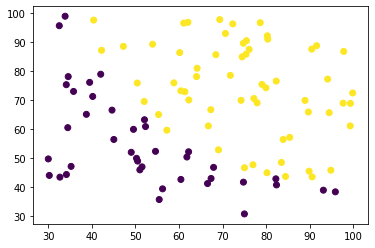

In [136]:
plt.scatter(df['x1'], df['x2'], c=df['y']);

In [137]:
alpha = 0.0009
steps = 1000
# result = fit(x, y, alpha=alpha, steps=steps)

### Test cost values

Cost values should always decrease, if not then we may have to adjust our learning rate, alpha.

In [138]:
def check_cost(costs):
    """
    Checks if the cost is always
    """
    for i in range(len(costs)-1):
        if costs[i] < costs[i+1]:
            print('error: cost increased at step: {}\nDecrease your learning rate...'.format(i+1))
            return 
        

In [139]:
costs, theta = result['costs'], result['theta']

check_cost(costs)

In [140]:
print(
    """
    Learning rate, alpha = {} seems to be low enough for our gradient descent algorithm to converge to minimum.
    """.format(alpha)
)


    Learning rate, alpha = 0.0009 seems to be low enough for our gradient descent algorithm to converge to minimum.
    


### Plot Cost by itteration

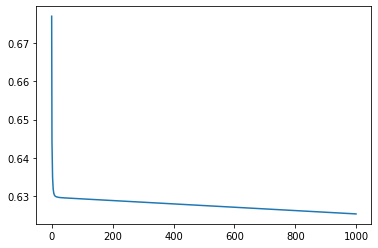

In [141]:
plt.plot(costs);

Seems like the cost is still going down, lets re-run the algorithm with more steps

### Re-run the algorithm with large number of steps (10,000,000)

In [149]:
alpha = 0.0009
steps = 10000000 #10,000,000
# result = fit(x, y, alpha=alpha, steps=steps)
costs, theta = result['costs'], result['theta']

In [156]:
print(costs[-3:], 'theta: ', theta, sep='\n')

[0.2035480148775637, 0.20354801484953938, 0.20354801482151505]
theta: 
[[-24.58540853]
 [  0.20162535]
 [  0.19681125]]


### Plot the hypothesis curve

Since we only have two features $x_1$ and $x_2$, we can plot one as a function of another on a 2D graph:

$$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$$

We want to plot $x_2$ as a function of $x_1$, hence rearranging for $x_2$, we get:

$$x_2 = -\frac{1}{\theta_2}(\theta_0 + \theta_1x_1)$$

Let $\theta \setminus \theta_2$ be a column vector with all values of $\theta$ except $\theta_2$, then the Vectorised form is:

$$x_2 = -\frac{1}{\theta_2}X\theta \setminus \theta_2$$


In [158]:
print('theta_0 = %s'%theta[0, 0], 'theta_1 = %s'%theta[1, 0], 'theta_2 = %s'%theta[2, 0], sep='\n')

theta_0 = -24.58540853445173
theta_1 = 0.20162535072282534
theta_2 = 0.1968112490497232


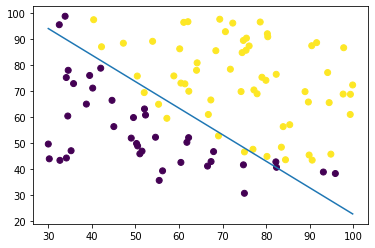

In [160]:
def plot(x, y, theta):
    x1, x2 = x[:, 0], x[:, 1]
    
    # Plot the points
    plt.scatter(x1, x2, c=y);
    
    # Plot decision Boundry
    x1_min, x1_max = x1.min(), x1.max()
    theta_0, theta_1, theta_2 = theta[:, 0]
    x2_1 = (-1/theta_2) * (theta_0 + theta_1 * x1_min)
    x2_2 = (-1/theta_2) * (theta_0 + theta_1 * x1_max)
    
    plt.plot([x1_min, x1_max], [x2_1, x2_2])
    
    
plot(x, y, theta)

### Logistic Regression using Sklearn

In [161]:
model = LogisticRegression()
model.fit(x, y[:, 0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
theta = np.append(model.intercept_, model.coef_)[:, np.newaxis]
theta

array([[-25.05219314],
       [  0.20535491],
       [  0.2005838 ]])

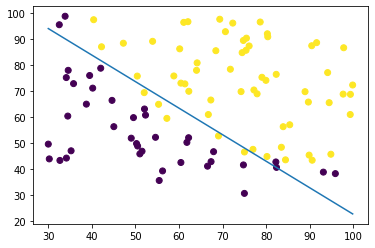

In [166]:
plot(x, y, theta)